## Iris Flower Data Dictionary:
* The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
* The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['axes.labelsize'] = 15.
plt.rcParams['xtick.labelsize'] = 15.
plt.rcParams['ytick.labelsize'] = 15.
plt.rcParams['figure.figsize'] = [15.,8.]
plt.rcParams['legend.fontsize'] = 13.

In [3]:
df = pd.read_csv("iris.csv")
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Comments:
### All columns having a low variance
### All Columns having low standard deviation and it is normally distributed

## Checking for null values

In [8]:
def missing_value(df):
    null_value = df.isnull().sum().sort_values(ascending=False)
    null_percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([null_value,null_percentage], axis=1, keys=['null_value', 'null_percentage'])
    return missing_data
missing_value(df)

,null_value,null_percentage
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


## No missing value found

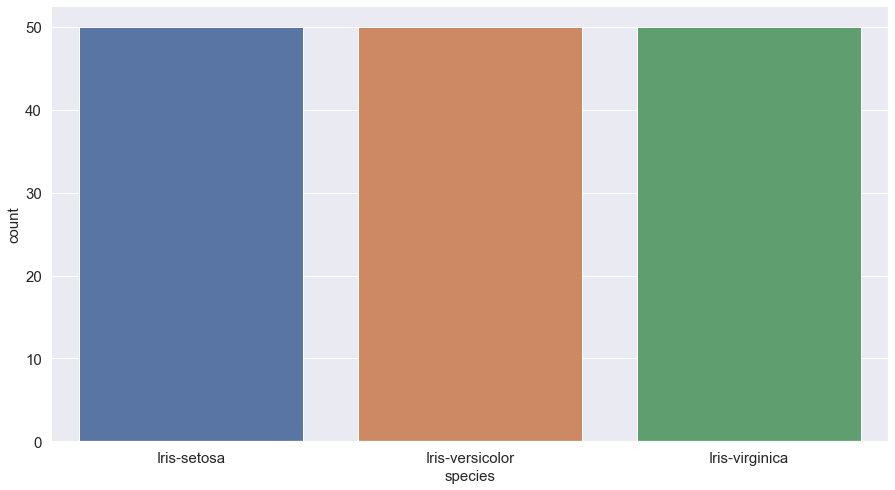

In [9]:
sns.countplot(data=df, x="species");

## All target values are eqaully distributed

In [10]:
df.columns[:]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

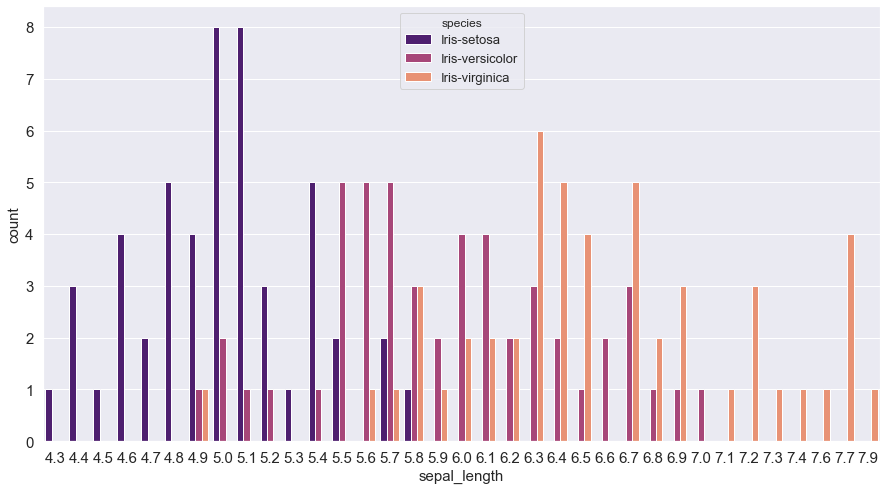

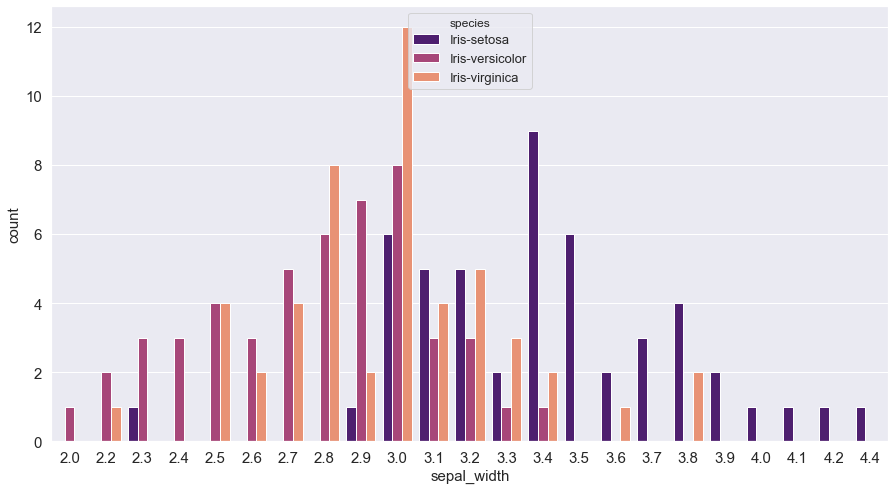

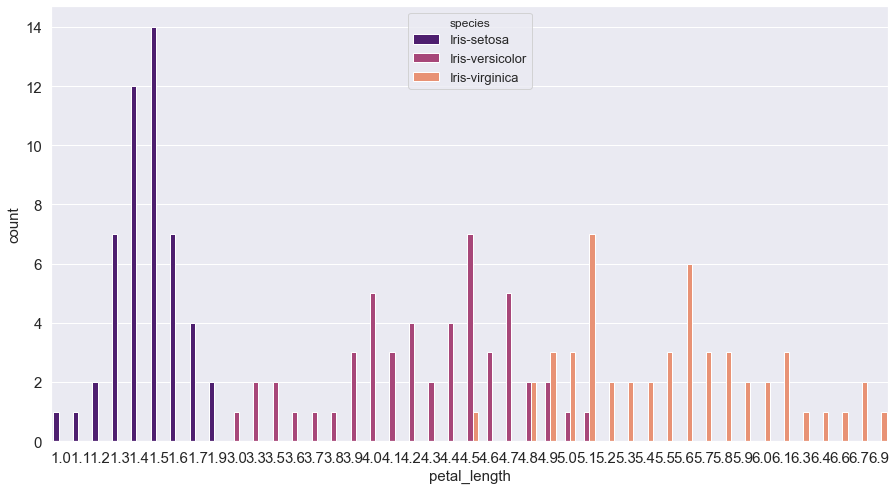

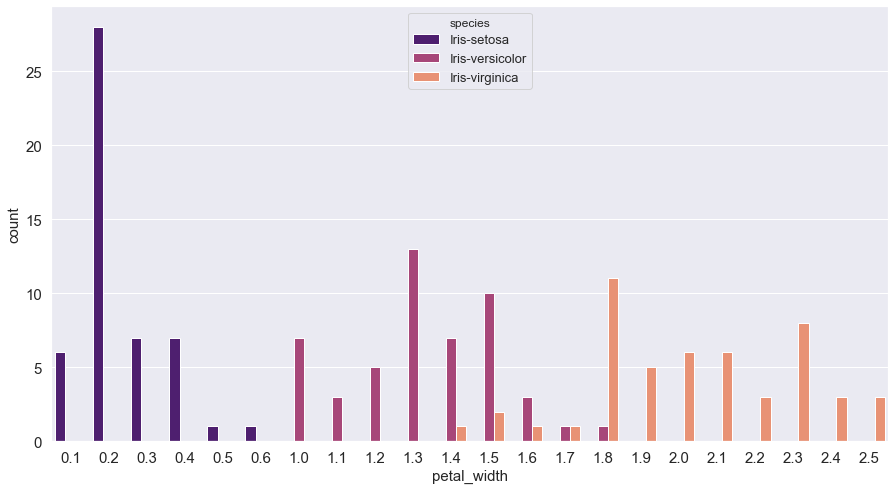

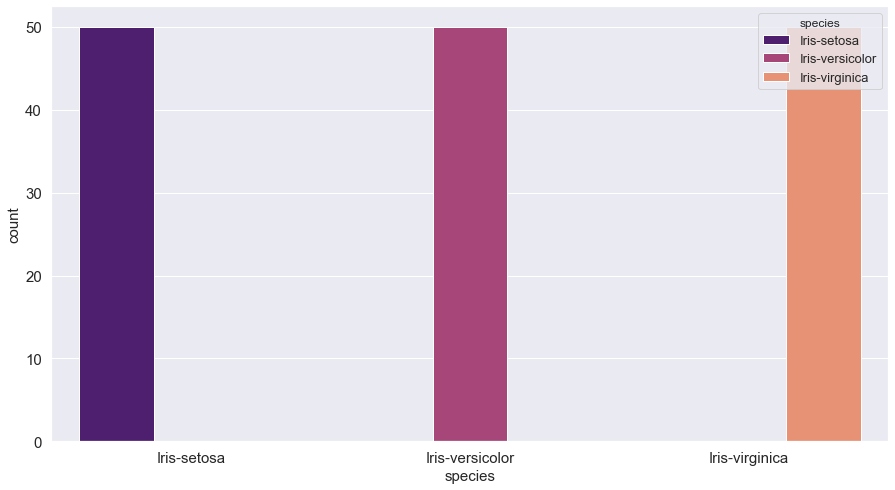

In [11]:
for i in df.columns[:]:
    sns.countplot(data=df, x=i, hue="species", palette="magma")
    plt.show()

## Comments:

### All species column is equally distributed
### Iris-setosa has the hightest value for sepal_lenght
### Iris-virginica has the highest value for sepal_width
### Iris-setosa has the hightest value for petal_lenght and petal_width

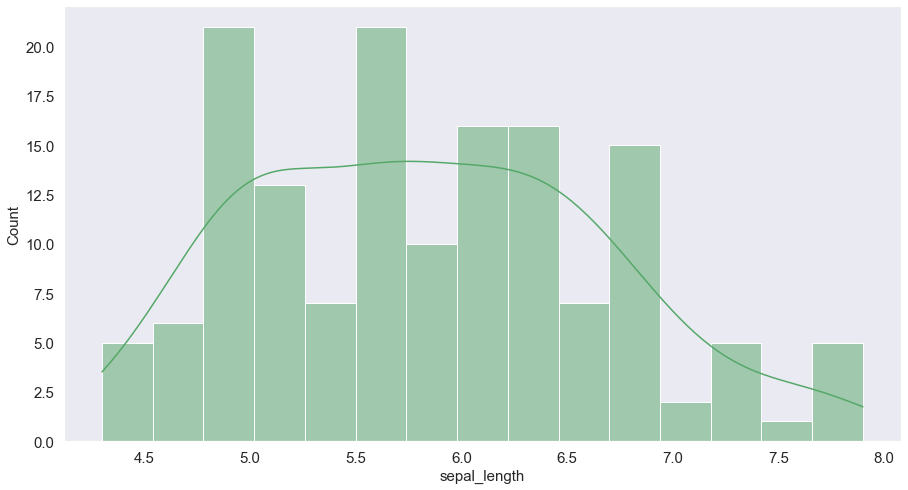

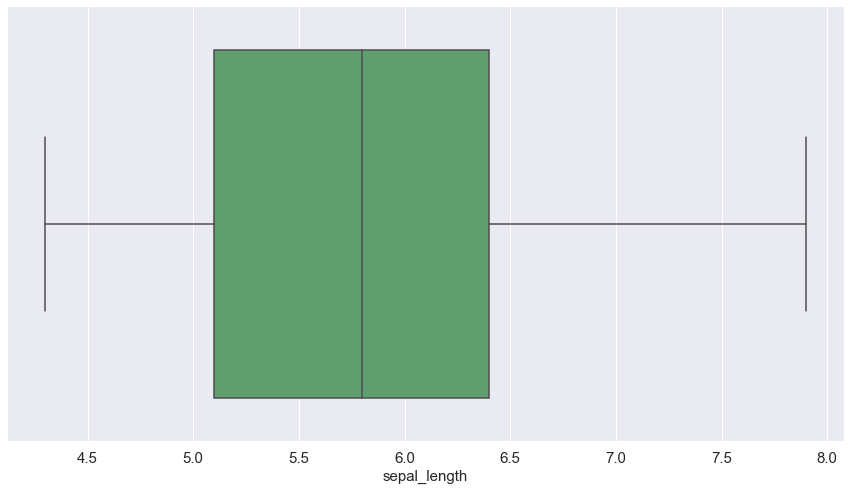

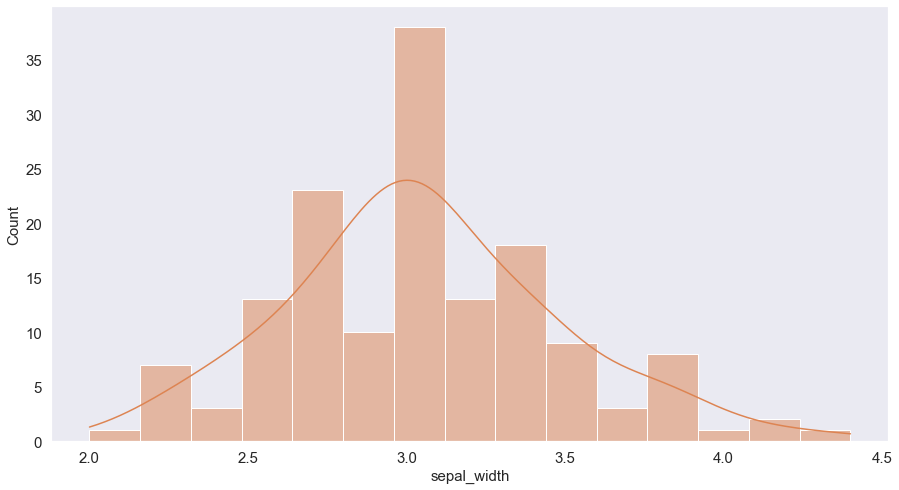

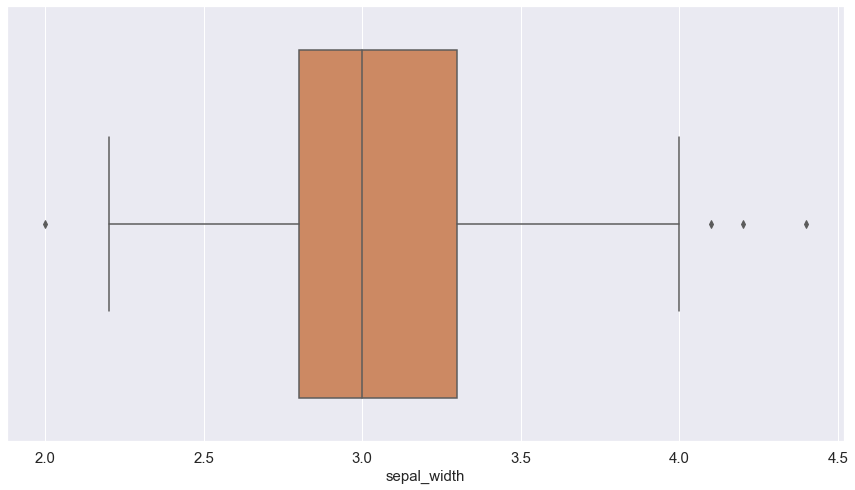

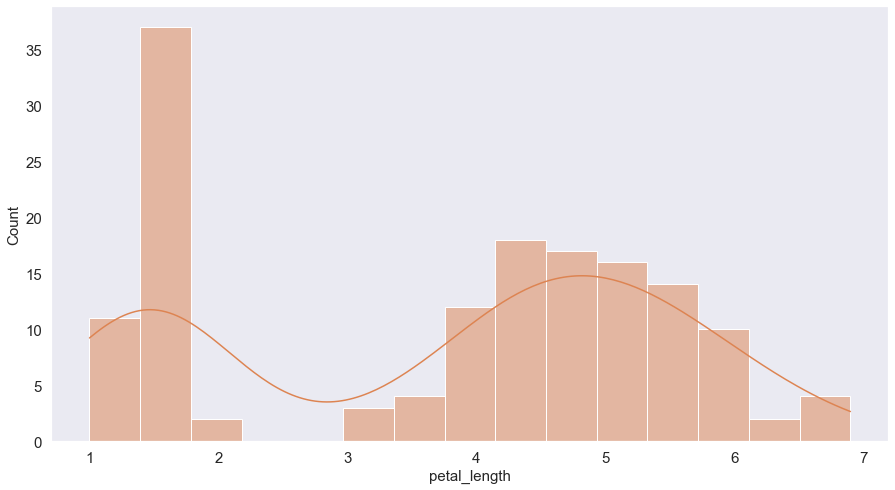

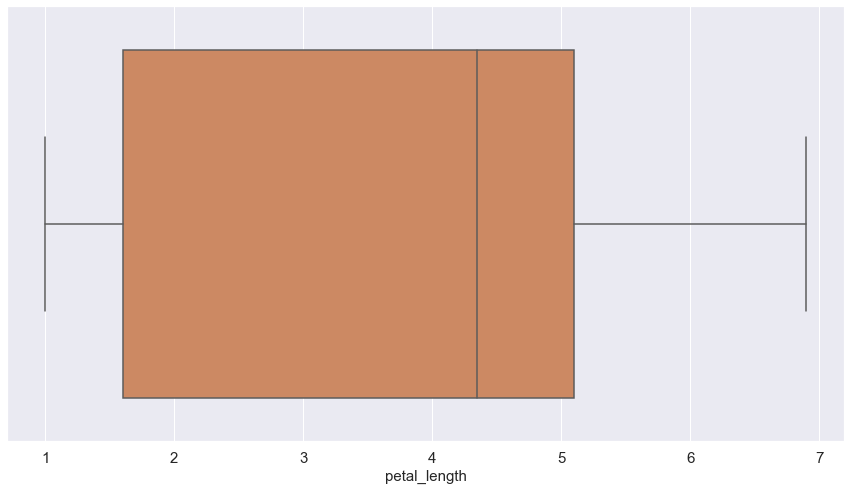

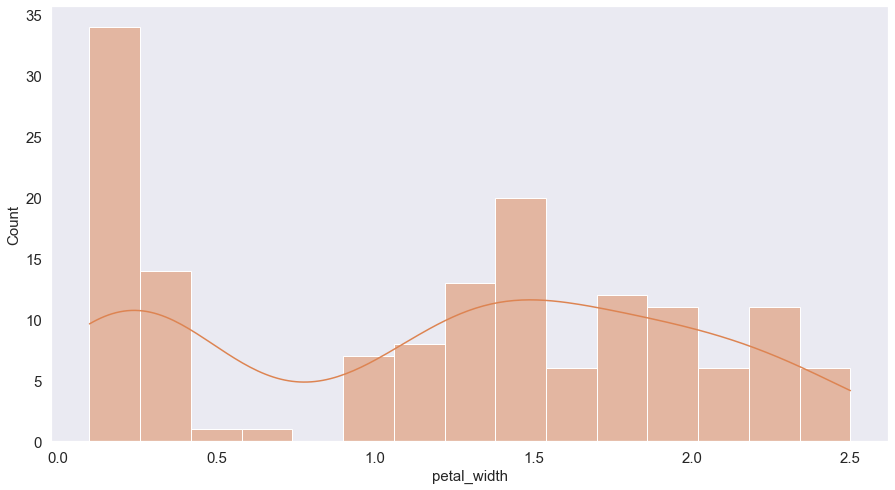

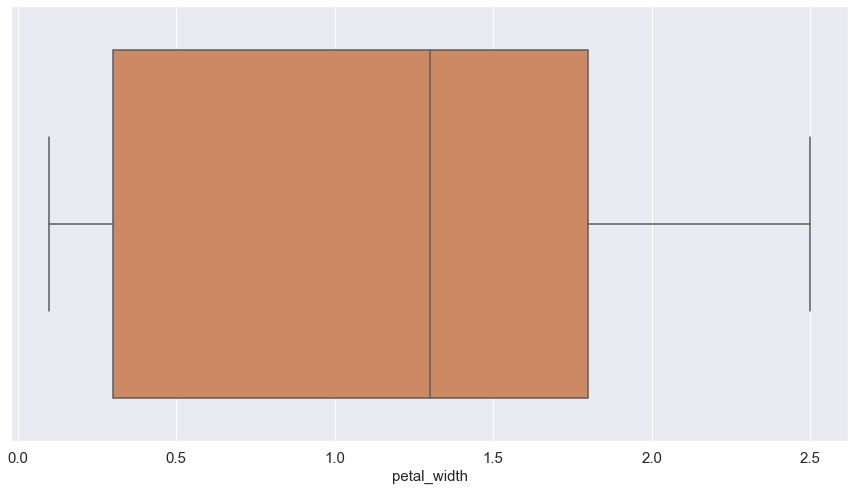

In [12]:
m=2
for i in df.columns[:4]:
    sns.histplot(data=df, x = i, color=sns.color_palette()[m], kde=True, bins=15)
    plt.grid()
    plt.show()
    sns.boxplot(data=df, x = i, color=sns.color_palette()[m])
    plt.show()
    m=+1

### sepal_width column has outliers
### distribution is not smooth

In [13]:
# skewness
df.iloc[:,:4].skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [14]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
x = df.drop(["species"],axis=1)
y = df["species"]

In [20]:
# Train And Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.score(x_test,y_test)

0.9777777777777777

In [24]:
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 50) 

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(x_test, y_test))

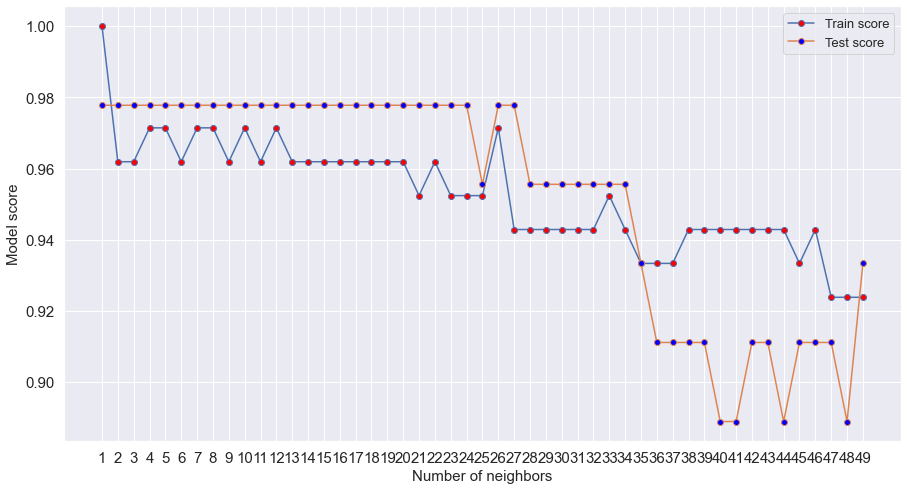

In [48]:
plt.plot(neighbors, train_scores, label="Train score",marker='o', markerfacecolor='red')
plt.plot(neighbors, test_scores, label="Test score",marker='o', markerfacecolor='blue')
plt.xticks(np.arange(1, 50, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

## from the above plot k value is 27

In [52]:
knn = KNeighborsClassifier(n_neighbors=27, p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [59]:
knn.score(x_train,y_train)

0.9428571428571428

In [53]:
knn.score(x_test,y_test)

0.9777777777777777

In [55]:
y_preds = knn.predict(x_test)

In [56]:
confusion_matrix(y_test,y_preds)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [58]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

